# Project 2: Analysis of Life Expectancy Factors
### Montgomery College, DATA201 Fall 2019  [Lucy Murray](lmurra38@montgomerycollege.edu)

# Introduction

Give the details on the source of your data, its content, and some questions you are interested in. The data should have at least 1000 rows

The dataset being utilized for this project can be found at [Kaggle](https://www.kaggle.com/kumarajarshi/life-expectancy-who), and it provides data from the World Health Organization (WHO) about factors concerning life expectancy. It includes information such as demographic variables, income composition, mortality rates, immunization, and the human development index. This dataset draws from the period of 2000 to 2015 for all countries. 

For this project, I am interested in finding:
* What features have high correlation with life expectancy?
* Can we use the linear regression model to determine a mathematical dependence on life expectancy to the features?

### Importing the Data

In [2]:
import os
print(os.getcwd())

C:\Users\murrayl\OneDrive - KCIC\ETC\MC\DATA201\PROJECT 2


In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns

#%matplotlib inline

In [3]:
# Import and check out the data
who = pd.read_csv('who.csv')

### Observing the Structure of the Dataset

In [4]:
who.info()
who.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Life expectancy                    2928 non-null float64
Adult Mortality                    2928 non-null float64
infant deaths                      2938 non-null int64
Alcohol                            2744 non-null float64
percentage expenditure             2938 non-null float64
Hepatitis B                        2385 non-null float64
Measles                            2938 non-null int64
 BMI                               2904 non-null float64
under-five deaths                  2938 non-null int64
Polio                              2919 non-null float64
Total expenditure                  2712 non-null float64
Diphtheria                         2919 non-null float64
 HIV/AIDS                          2938 non-null

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [5]:
who.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


# Wrangling with Pandas and Numpy

I decided to prepare and wrangle my data with the pandas and numpy packages. First, I removed NAs, and then checked to see the unique countries and years included in the dataset. I decided to subset by only the years 2005-2015, so to reduce the observation to only the 10 year period. Finally, I cleaned up the column titles by replacing spaces with underscores and lowering the case. This improved useability of the dataset.

### Removing NAs and Subsetting the Data

In [6]:
# Remove NAs
who_clean = who.dropna()

In [7]:
who_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1649 entries, 0 to 2937
Data columns (total 22 columns):
Country                            1649 non-null object
Year                               1649 non-null int64
Status                             1649 non-null object
Life expectancy                    1649 non-null float64
Adult Mortality                    1649 non-null float64
infant deaths                      1649 non-null int64
Alcohol                            1649 non-null float64
percentage expenditure             1649 non-null float64
Hepatitis B                        1649 non-null float64
Measles                            1649 non-null int64
 BMI                               1649 non-null float64
under-five deaths                  1649 non-null int64
Polio                              1649 non-null float64
Total expenditure                  1649 non-null float64
Diphtheria                         1649 non-null float64
 HIV/AIDS                          1649 non-null

In [8]:
# Observing the unique values of the 'country' column
who_clean.Country.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bangladesh',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Costa Rica', 'Croatia', 'Cyprus',
       'Djibouti', 'Dominican Republic', 'Ecuador', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Fiji',
       'France', 'Gabon', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti',
       'Honduras', 'India', 'Indonesia', 'Iraq', 'Ireland', 'Israel',
       'Italy', 'Jamaica', 'Jordan', 'Kazakhstan', 'Kenya', 'Kiribati',
       'Latvia', 'Lebanon', 'Lesotho', 'Liberia', 'Lithuania',
       'Luxembourg', 'Madagascar', 'Malawi', 'Malaysia'

In [9]:
# Observing the unique values of the 'year' column
who_clean.Year.unique()

array([2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005,
       2004, 2003, 2002, 2001, 2000], dtype=int64)

In [10]:
# Filtering by years from 2005 - 2015
who_clean = who_clean[who_clean.Year > 2004]

In [11]:
who_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1243 entries, 0 to 2932
Data columns (total 22 columns):
Country                            1243 non-null object
Year                               1243 non-null int64
Status                             1243 non-null object
Life expectancy                    1243 non-null float64
Adult Mortality                    1243 non-null float64
infant deaths                      1243 non-null int64
Alcohol                            1243 non-null float64
percentage expenditure             1243 non-null float64
Hepatitis B                        1243 non-null float64
Measles                            1243 non-null int64
 BMI                               1243 non-null float64
under-five deaths                  1243 non-null int64
Polio                              1243 non-null float64
Total expenditure                  1243 non-null float64
Diphtheria                         1243 non-null float64
 HIV/AIDS                          1243 non-null

In [27]:
# Removing spaces and adding underscores
who_clean.columns = who_clean.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

In [26]:
who_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1243 entries, 0 to 2932
Data columns (total 22 columns):
country                            1243 non-null object
year                               1243 non-null int64
status                             1243 non-null object
life_expectancy                    1243 non-null float64
adult_mortality                    1243 non-null float64
infant_deaths                      1243 non-null int64
alcohol                            1243 non-null float64
percentage_expenditure             1243 non-null float64
hepatitis_b                        1243 non-null float64
measles                            1243 non-null int64
bmi                                1243 non-null float64
under-five_deaths                  1243 non-null int64
polio                              1243 non-null float64
total_expenditure                  1243 non-null float64
diphtheria                         1243 non-null float64
hiv/aids                           1243 non-null

# Visualing the Data with Matplotlib and Seaborn Packages

With the Exploratory Data Analysis approach, I utilized the Matplotlib and Seaborn packages to visualize the data. These visualizations helped enable me to see where correlations might exist, and to select features that could be used for my linear regression model.

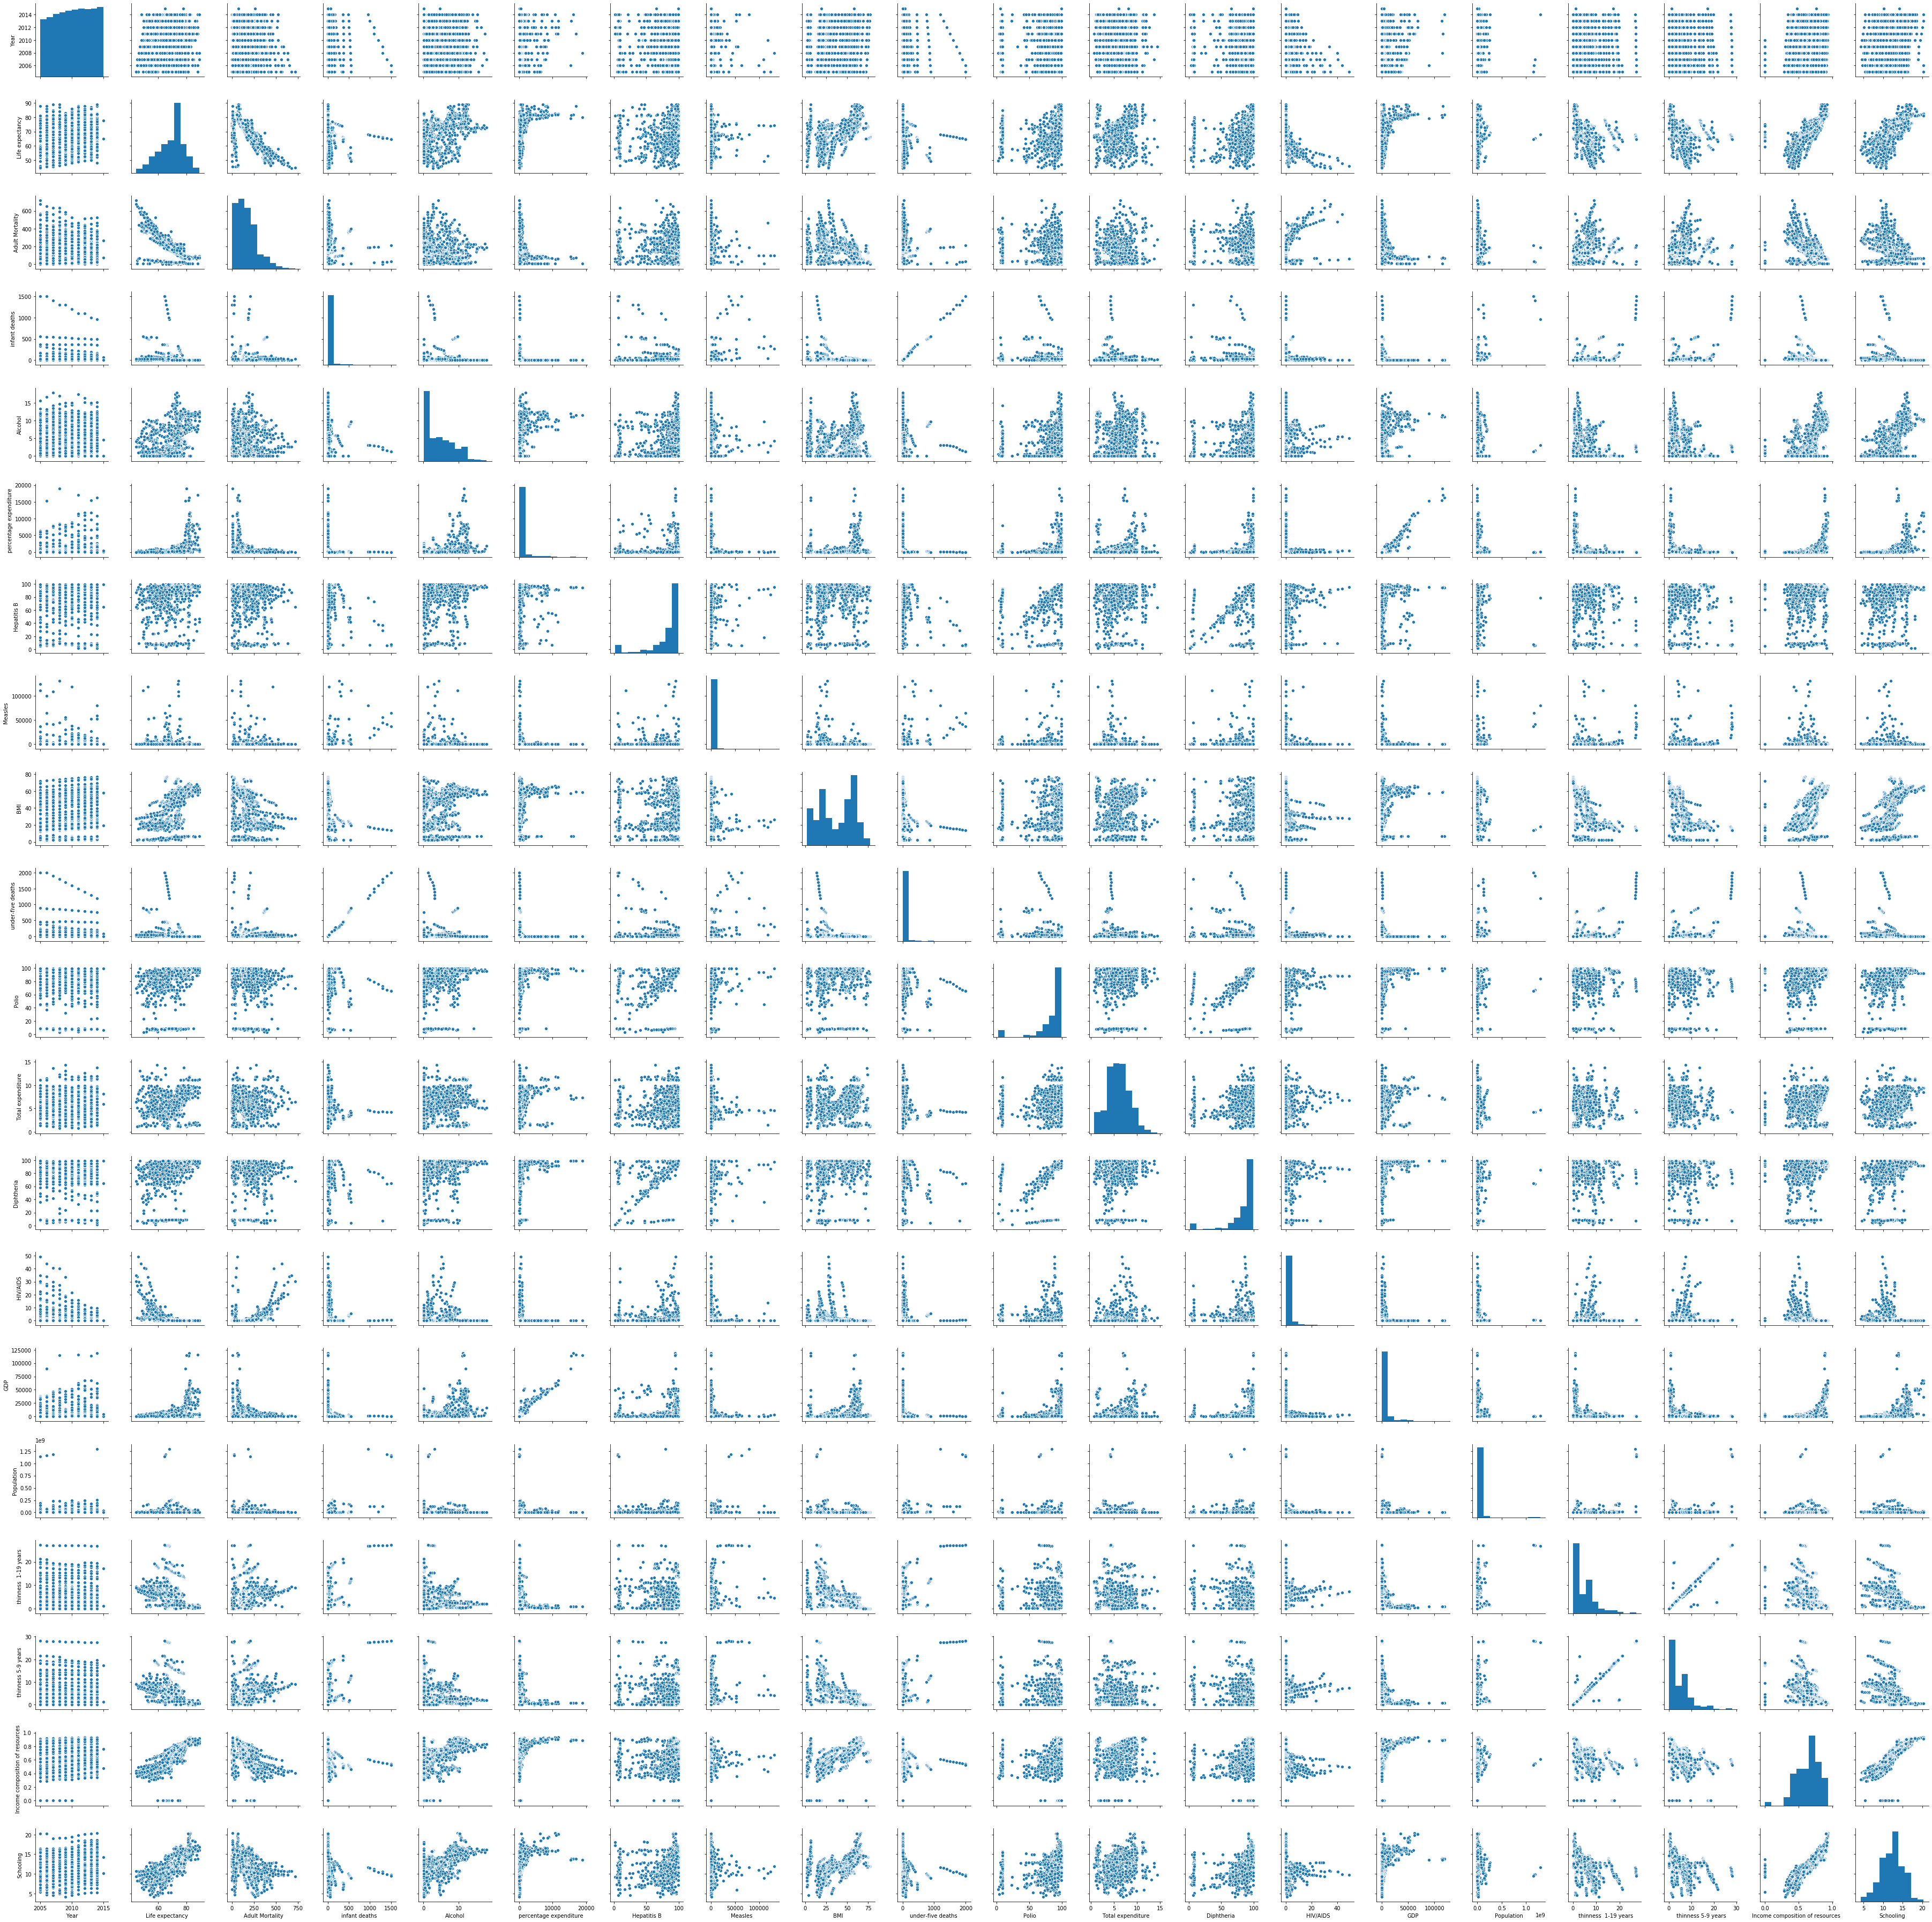

In [12]:
# Pairplots of all features
sns.pairplot(who_clean)

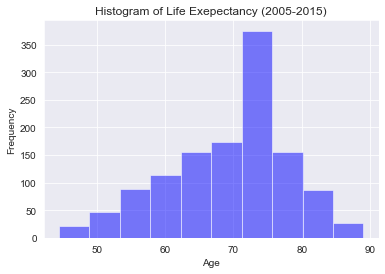

In [30]:
# Histogram of life expectancy to see the big picture
x = who_clean['life_expectancy']
num_bins = 10
n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title(r'Histogram of Life Exepectancy (2005-2015)')
plt.show()

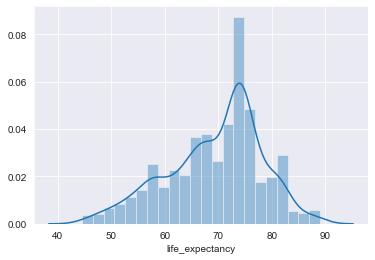

In [32]:
# Using Seaborn plot to draw the histogram with a line of best fit
sns.distplot(who_clean['life_expectancy'])

In [33]:
# Creating numerial correlations
who_clean.corr()

,year,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
year,1.000000,0.080885,-0.038865,-0.031854,-0.123041,0.045027,0.016386,-0.042595,0.071199,-0.034071,-0.026933,0.063953,0.016432,-0.141629,0.072395,-0.014241,-0.039219,-0.036560,0.114409,0.109643
life_expectancy,0.080885,1.000000,-0.688379,-0.181806,0.411309,0.422614,0.207846,-0.064269,0.551085,-0.204962,0.328510,0.199082,0.352756,-0.571753,0.454764,-0.024441,-0.464812,-0.464602,0.797713,0.751515
adult_mortality,-0.038865,-0.688379,1.000000,0.048385,-0.178229,-0.246866,-0.124115,0.003258,-0.359296,0.066766,-0.203648,-0.104623,-0.195124,0.512184,-0.264069,-0.024908,0.271630,0.278872,-0.496959,-0.437853
infant_deaths,-0.031854,-0.181806,0.048385,1.000000,-0.091084,-0.092883,-0.252538,0.512255,-0.227819,0.996785,-0.159110,-0.149585,-0.181873,0.016377,-0.100380,0.653438,0.492333,0.489554,-0.162148,-0.215971
alcohol,-0.123041,0.411309,-0.178229,-0.091084,1.000000,0.410332,0.128551,-0.026138,0.351346,-0.084718,0.227036,0.226992,0.226255,-0.037677,0.439585,-0.035247,-0.411158,-0.394924,0.575569,0.607619
percentage_expenditure,0.045027,0.422614,-0.246866,-0.092883,0.410332,1.000000,0.012802,-0.059274,0.261308,-0.094449,0.126309,0.203031,0.141366,-0.101706,0.956182,-0.019434,-0.264109,-0.263603,0.430623,0.431294
hepatitis_b,0.016386,0.207846,-0.124115,-0.252538,0.128551,0.012802,1.000000,-0.085029,0.132644,-0.264437,0.514358,0.122702,0.698098,-0.091862,0.034241,-0.141552,-0.161492,-0.156474,0.188227,0.233755
measles,-0.042595,-0.064269,0.003258,0.512255,-0.026138,-0.059274,-0.085029,1.000000,-0.129375,0.499214,-0.038662,-0.109517,-0.054967,0.006881,-0.058225,0.339862,0.193797,0.183955,-0.054834,-0.086473
bmi,0.071199,0.551085,-0.359296,-0.227819,0.351346,0.261308,0.132644,-0.129375,1.000000,-0.234973,0.179189,0.191629,0.181819,-0.214859,0.284495,-0.084155,-0.539835,-0.544703,0.573279,0.566119
under-five_deaths,-0.034071,-0.204962,0.066766,0.996785,-0.084718,-0.094449,-0.264437,0.499214,-0.234973,1.000000,-0.174321,-0.149271,-0.200442,0.029222,-0.102915,0.637154,0.491310,0.487492,-0.177070,-0.228578


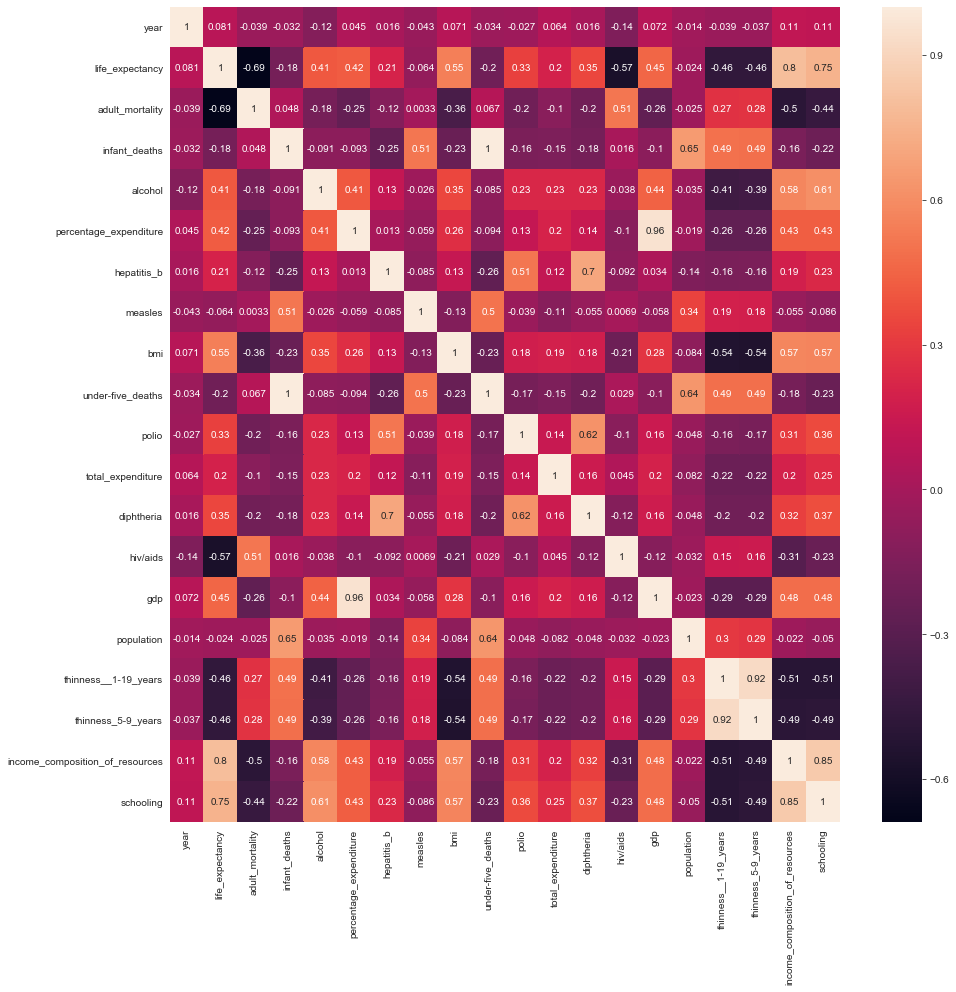

In [34]:
# Drawing a heatmap of correlations
var = who_clean.corr()
plt.figure(figsize = (15,15))
sns.heatmap(var, xticklabels=var.columns, yticklabels=var.columns, annot=True)

# Scikit-learn linear regression test

I used the scikit-learn linear regression to train, test and predict a numerical target variable. I then used the appropriate metric and interpreted the meaning of the score. Based on the heat map above, I decided to look at the correlation between life expectancy and schooling. I used the following steps:

__1. Assigned the column "life_expectancy" to x and the column "schooling" to y. I selected "schooling" as the feature, due to the .75 correlation observed in the heatmap.__

In [80]:
# Assign columns to X and y and reshape.
X = who_clean['life_expectancy']         
y = who_clean['schooling']
X = X.values.reshape(len(X),1)
y = y.values.reshape(len(y),1)

__2. Split the data into train and test data.__

In [81]:
from sklearn.model_selection import train_test_split

In [82]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30, random_state=9)

__3. Intiated the linear regression.__

In [83]:
from sklearn.linear_model import LinearRegression
LinReg = LinearRegression()

__4. Checked the size of the training and test data.__

In [84]:
X_train.shape, y_train.shape

((870, 1), (870, 1))

In [85]:
X_test.shape, y_test.shape

((373, 1), (373, 1))

__5. Fit the data to a training model.__

In [86]:
LinReg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

__6. Used the model to predict the test data.__

In [92]:
y_predicted = LinReg.predict(X_test)

__7. Measured the accuracy of the model by using the mean square error (MSE).__

In [88]:
# Using Numpy
mean_sq_error = np.mean( (y_test - y_predicted) **2 )
print(mean_sq_error)

3.473388160859476


In [89]:
# Using sklearn metrics
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_true = y_test, y_pred = LinReg.predict(X_test)))

3.473388160859476


__8. Found the error of the training data.__

In [90]:
print(mean_squared_error(y_true = y_train, y_pred = LinReg.predict(X_train)))

3.3662779544130332


__9. Posed the final question: How much does the model (x variable) explain  the variability of the response data around its mean? The result we find shows that about 56% of the variability in Y can be explained using X__

In [91]:
LinReg.score(X_test, y_test)

0.5589044108715218

# Histogram of the residuals

I plotted a histogram of the residuals and checked to see if they have a Gaussian distribution. Does it satisfy the assumptions for inference?

(array([ 5.,  4.,  8., 34., 91., 81., 80., 34., 29.,  7.]),
 array([-6.40183367, -5.26534981, -4.12886594, -2.99238207, -1.85589821,
        -0.71941434,  0.41706953,  1.55355339,  2.69003726,  3.82652113,
         4.96300499]),
 <a list of 10 Patch objects>)

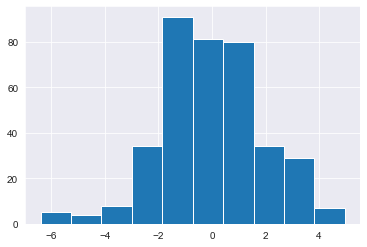

In [78]:
plt.hist(y_test - y_predicted)

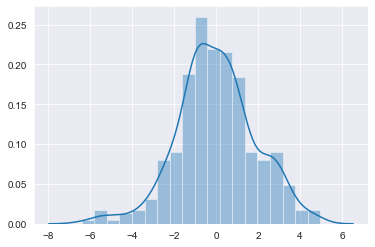

In [79]:
# Using Seaborn plot to draw the histogram with a line of best fit
sns.distplot(y_test - y_predicted)

# Scatterplots of predicted values and residuals

I utilized scatterplots of predicted values and residuals to check assumption of homoscedasticity. 

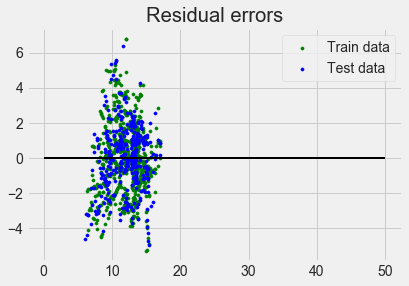

In [101]:
## setting plot style 
plt.style.use('fivethirtyeight') 
  
## plotting residual errors in training data 
plt.scatter(LinReg.predict(X_train), LinReg.predict(X_train) - y_train, 
            color = "green", s = 10, label = 'Train data') 
  
## plotting residual errors in test data 
plt.scatter(LinReg.predict(X_test), LinReg.predict(X_test) - y_test, 
            color = "blue", s = 10, label = 'Test data') 
  
## plotting line for zero residual error 
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2) 
  
## plotting legend 
plt.legend(loc = 'upper right') 
  
## plot title 
plt.title("Residual errors") 
  
## function to show plot 
plt.show() 

According to [Statistics How To](https://www.statisticshowto.datasciencecentral.com/homoscedasticity/): "homoscedasticity means “having the same scatter.” For it to exist in a set of data, the points must be about the same distance from the line, as shown in the picture above. The opposite is heteroscedasticity (“different scatter”), where points are at widely varying distances from the regression line."

<function matplotlib.pyplot.show(*args, **kw)>

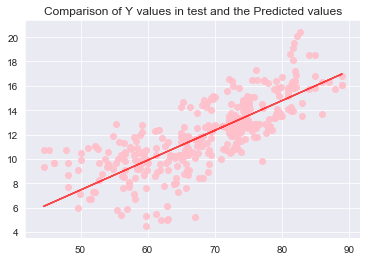

In [77]:
plt.title('Comparison of Y values in test and the Predicted values')
plt.plot(X_test, y_predicted, color = 'red', alpha = 0.7)
plt.scatter(X_test, y_test, color = 'pink', alpha = 0.9)
plt.show

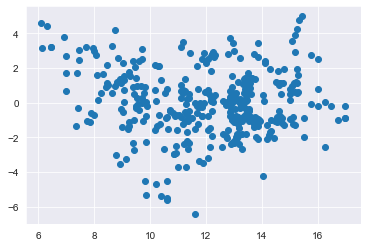

In [57]:
plt.scatter(y_predicted, y_test - y_predicted)

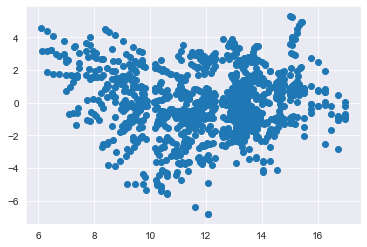

In [58]:
plt.scatter(LinReg.predict(X), y - LinReg.predict(X))

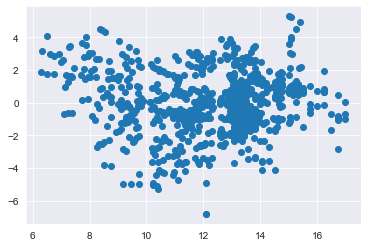

In [59]:
plt.scatter(LinReg.predict(X_train), y_train - LinReg.predict(X_train))

# Interpretation

The coefficient of the linear regression is ~0.244 and the y-intercept is ~-4.765. The 0.244 slightly positive coefficient indicates a weak positive linear relationship. Thus, as schooling increases, life expectancy slightly increases. The negative y-intercept has little meaning, because we would not expect life expectancy to be set to 0.

In [63]:
print(LinReg.coef_)

[[0.24427779]]


In [64]:
print(LinReg.intercept_)

[-4.76477839]


In [65]:
from sklearn.neural_network import MLPRegressor

In [66]:
nn_reg = MLPRegressor(solver='lbfgs', alpha=1e-5,
                     hidden_layer_sizes=(5,2,2), random_state=1)

In [67]:
nn_reg.fit(X_train, y_train)

C:\Users\murrayl\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1321: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegressor(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(5, 2, 2), learning_rate='constant',
             learning_rate_init=0.001, max_iter=200, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [68]:
y_pred_nn = nn_reg.predict(X_test)

In [69]:
np.mean( (y_test - y_pred_nn) **2 )

13.066451367933777

In [70]:
np.mean( (y_train - nn_reg.predict(X_train)) **2 )

12.140255063675019

In [71]:
from sklearn.metrics import r2_score, mean_absolute_error
mean_absolute_error(y_test, y_pred_nn)

1.4428156945988015

In [72]:
mean_absolute_error(y_train, nn_reg.predict(X_train))

1.4105453786941544

In [74]:
#The closer the r squared value is to 100 percent, the better the model is.
r2_score(y_test, y_pred_nn)

0.5589044117480797